In [25]:
# the imports
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

# import all the important functions
from implementations import *
from helpers import *

#upload data
(labels, data, ids) = load_csv_data("data/train.csv")  # load data
# Preparing data

# set values of -999 to NaN. 
# Then calculate the means of the features. 
# Replace NaN values with new values.

data_process = np.array(data[:1000,:])
labels_select = np.array(labels[:1000])
lab = []
for entry in labels_select:
    if int(entry) == 1:
        lab.append(1)
    else:
        lab.append(0)
lab = np.array(lab)
data_process[data_process == -999] = np.nan

# Filtering weak features and samples

# retrieve percentage for each feature 
# - how many nan's are there?

[0.136, 0.0, 0.0, 0.0, 0.724, 0.724, 0.724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.724, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.405, 0.405, 0.405, 0.724, 0.724, 0.724, 0.0]


(array([19.,  1.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  7.]),
 array([0.    , 0.0724, 0.1448, 0.2172, 0.2896, 0.362 , 0.4344, 0.5068,
        0.5792, 0.6516, 0.724 ]),
 <a list of 10 Patch objects>)

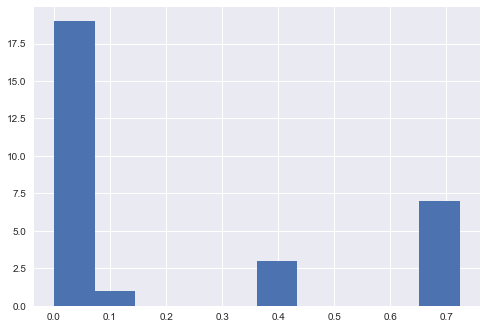

In [32]:
# filter out really shitty features
# retrieve percentage for each feature 
# - how many nan's are there?

nan_count = []
for c in data_process.T:
    count = 0
    for e in c:
        if np.isnan(e):
            count += 1
    pcent = count / data_process.shape[0]
    nan_count.append(pcent)
print(nan_count)

plt.style.use('seaborn')
plt.hist(nan_count)

In [28]:
# filter out features which have nan values of 50%

data_set_filtered = []
for idx, entry in enumerate(nan_count):
    if entry < 0.6:
        #append the column of the original dataset that is good
        data_set_filtered.append(data_process.T[idx]) 
#save that shit as an np array
data_set_filtered = np.array(data_set_filtered).T #save that shit as an np array

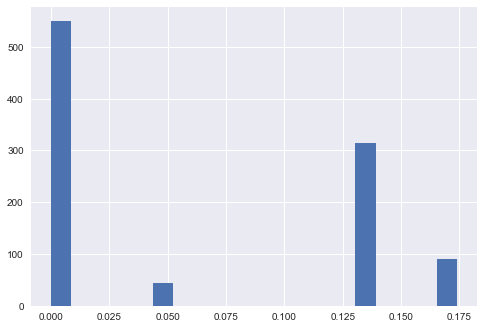

In [31]:
# filter out samples that have more than half of their features as nan (crappy samples)

nan_count_2 = []
data_set_filtered_2 = [] # dataset filtered for columns and samples
y = [] # array that gets rid of entries that are no longer corresponding in the dataframe
for sample in data_set_filtered:
    count = 0
    for col in sample:
        if np.isnan(col):
            count += 1
    pcent = count / data_set_filtered.shape[1]
    nan_count_2.append(pcent)

# print(nan_count_2)

for idx, entry in enumerate(nan_count_2):
    if entry < 0.15:
        y.append(lab[idx])
        data_set_filtered_2.append(data_set_filtered[idx])
data_set_filtered_2 = np.array(data_set_filtered_2) # turn dat shit into an array
y = np.array(y) # also this one gotta be an array

plt.style.use('seaborn')

plt.hist(nan_count_2,20)
plt.show()

In [65]:
# print new dimensions of the dataframe after filtering

print('The original dimensions of the training data set was {0} samples'
      ' and {1} columns. After feature and sample filtering, there are'
      ' {2} samples and {3} columns'.format(data_process.shape[0],
                                            data_process.shape[1],
                                            data_set_filtered_2.shape[0],
                                            data_set_filtered_2.shape[1]))


The original dimensions of the training data set was 250000 samples and 30 columns. After feature and sample filtering, there are 223877 samples and 23 columns


In [59]:
# variable reassigned
data_nan = data_set_filtered_2.copy() 
# create list with average values of columns, excluding nans
column_means = [] 
for column in data_nan.T:
    column_means.append(np.nanmean(column))
    
# variable containing locations of nan in data frame
inds = np.where(np.isnan(data_nan)) 
# reassign locations of nan to the column means
data_nan[inds] = np.take(column_means, inds[1])


[[ 6.74350000e+01  2.15000000e+00]
 [ 4.62260000e+01  7.25000000e-01]
 [ 4.42510000e+01  2.05300000e+00]
 [ 8.18527277e+01  3.06453782e-02]
 [ 8.18527277e+01  3.06453782e-02]
 [ 9.05470000e+01 -2.41200000e+00]
 [ 1.23010000e+02  8.64000000e-01]
 [ 3.06380000e+01 -7.15000000e-01]
 [ 8.18527277e+01  3.06453782e-02]
 [ 1.67735000e+02 -2.76700000e+00]
 [ 7.67730000e+01 -7.90000000e-01]
 [ 9.31170000e+01 -9.70000000e-01]
 [ 8.18527277e+01  3.06453782e-02]
 [ 8.18527277e+01  3.06453782e-02]
 [ 3.62630000e+01 -7.66000000e-01]
 [ 8.18527277e+01  3.06453782e-02]
 [ 8.18527277e+01  3.06453782e-02]
 [ 8.18527277e+01  3.06453782e-02]
 [ 1.95533000e+02  1.15600000e+00]
 [ 8.18527277e+01  3.06453782e-02]
 [ 8.18527277e+01  3.06453782e-02]
 [ 3.55270000e+01  4.34700000e+00]
 [ 1.70712000e+02 -1.96100000e+00]
 [ 7.72210000e+01 -4.90000000e-02]
 [ 8.06270000e+01  9.93000000e-01]
 [ 3.32500000e+01 -3.19900000e+00]
 [ 1.82449000e+02  1.38300000e+00]
 [ 8.11700000e+01  3.10200000e+00]
 [ 7.11270000e+01  2

In [63]:
# standardize and normalize the features
column_variance = []
for idx, column in enumerate(data_nan.T):
    mean = np.mean(column)
    variance = np.std(column)
    for entry, value in enumerate(column):
        data_nan[entry, idx] = (value - mean)/variance

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\remy\Documents\machine_learning\project_1\Project_without_class\implementations.py:18: RuntimeWarning: divide by zero encountered in log
  loss = (-y * np.log(tx) - (1 - y) * np.log(1 - tx)).mean()
C:\Users\remy\Documents\machine_learning\project_1\Project_without_class\implementations.py:18: RuntimeWarning: invalid value encountered in multiply
  loss = (-y * np.log(tx) - (1 - y) * np.log(1 - tx)).mean()


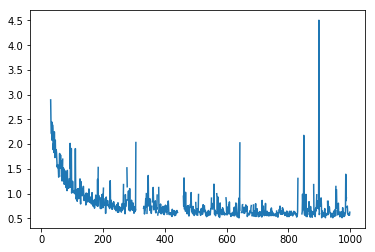

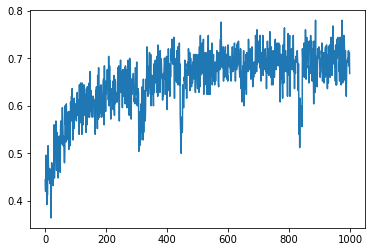

0.668


In [75]:
%load_ext autoreload
%autoreload 2

X = prepare_data_order_3(data_nan)
initial_w = np.ones(X.shape[1])

test_loss,w, test_acc = logistic_regression(y, X, initial_w, max_iters = 1000, gamma = 0.05, method = "sgd", writing = False)
plt.plot(test_loss)
plt.show()
plt.plot(test_acc)
plt.show()

print(test_acc[-1])

In [76]:
max(test_acc)

0.78

In [59]:

val_acc = []
val_loss = []
for i in range(len(w)):
    h = sigmoid(np.dot(X, w[i]))
    val_acc.append(compute_accuracy_logistic_regression(h,y))
    val_loss.append(compute_loss(y, h, w[i], method = "logistic"))

C:\Users\remy\Documents\machine_learning\project_1\Project_without_class\implementations.py:18: RuntimeWarning: divide by zero encountered in log
  loss = (-y * np.log(tx) - (1 - y) * np.log(1 - tx)).mean()
C:\Users\remy\Documents\machine_learning\project_1\Project_without_class\implementations.py:18: RuntimeWarning: invalid value encountered in multiply
  loss = (-y * np.log(tx) - (1 - y) * np.log(1 - tx)).mean()


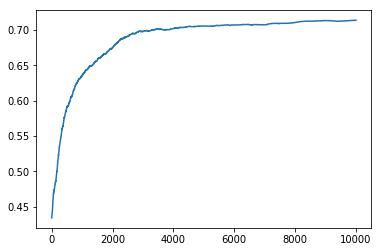

In [60]:
plt.plot(val_acc)

In [70]:
%load_ext autoreload
%autoreload 2

X = prepare_data_order_2(data_nan)
initial_w = np.ones(X.shape[1])

test_loss, w, test_acc = stochastic_gradient_descent(y, X, initial_w, write = True)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Gradient Descent(0/9999): loss=23.940603511649314, w0=0.6116308636215155, w1=1.000661435722479
Gradient Descent(500/9999): loss=0.2551575478917232, w0=-0.9344577587702134, w1=0.970705133616901
Gradient Descent(1000/9999): loss=19850.29963149452, w0=-2.4627929822171786, w1=0.8754130606684445
Gradient Descent(1500/9999): loss=280.9829756573092, w0=-8.945090352097619, w1=-2.422211716050518
Gradient Descent(2000/9999): loss=36.75833902536178, w0=-9.378608435010065, w1=-2.453490238112599
Gradient Descent(2500/9999): loss=7858752137.528243, w0=29148.10385845526, w1=-727.533507132826


KeyboardInterrupt: 

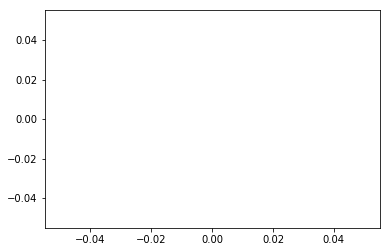

In [71]:
plt.plot(test_loss)
plt.show()

